In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.experiment.defaultFinalStates import finalStates
from collections import OrderedDict
from smodels.tools.physicsUnits import fb, GeV

In [2]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile, erasePrompt=['spin'])

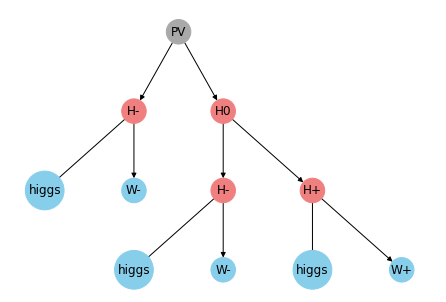

[PV, H-, H0, higgs, W-, H-, H+, higgs, W-, higgs, W+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, H-), (PV, H0), (H-, higgs), (H-, W-), (H0, H-), (H0, H+), (H-, higgs), (H-, W-), (H+, higgs), (H+, W+)]


In [3]:
stringEla = "(PV > H0(1),H-(2)), (H0(1) > H+(3),H-(4)), (H+(3) > W+,higgs), (H-(4) > W-,higgs), (H-(2) > W-,higgs)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEla, model=model)
treeA = TheorySMS()
treeA.add_nodes_from(expSMS.nodes)
treeA.add_edges_from(expSMS.edgeIndices)
treeA.prodXSec = 1.0*fb
treeA.maxWeight = 1.0*fb
treeA.setGlobalProperties()

treeA.draw(nodeScale=3)
print(treeA.nodes)
print(treeA.nodeIndices)
print(treeA.edges)

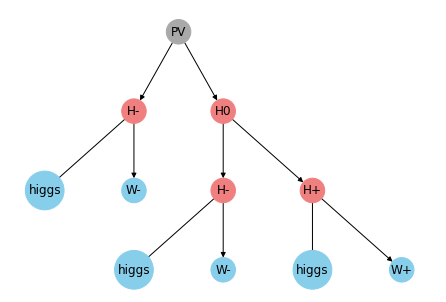

[PV, H-, H0, higgs, W-, H-, H+, higgs, W-, higgs, W+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, H-), (PV, H0), (H-, higgs), (H-, W-), (H0, H-), (H0, H+), (H-, higgs), (H-, W-), (H+, higgs), (H+, W+)]


In [4]:
stringElb = "(PV > H0(1),H-(2)), (H-(2) > W-,higgs), (H0(1) > H-(3),H+(4)), (H-(3) > higgs,W-), (H+(4) > W+,higgs)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringElb, model=model)
treeB = TheorySMS()
treeB.add_nodes_from(expSMS.nodes)
treeB.add_edges_from(expSMS.edgeIndices)
treeB.prodXSec = 1.0*fb
treeB.maxWeight = 1.0*fb
treeB.setGlobalProperties()

treeB.draw(nodeScale=3)
print(treeB.nodes)
print(treeB.nodeIndices)
print(treeB.edges)

In [5]:
treeA == treeB

True

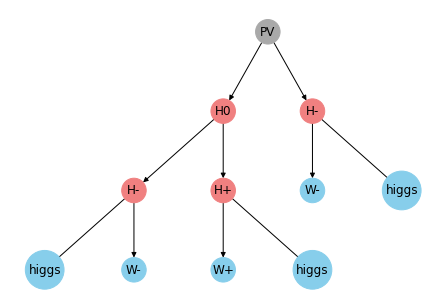

[PV, H0, H-, H-, H+, W-, higgs, higgs, W-, W+, higgs]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, H0), (PV, H-), (H0, H-), (H0, H+), (H-, W-), (H-, higgs), (H-, higgs), (H-, W-), (H+, W+), (H+, higgs)]


In [6]:
stringElb = "(PV > H0(1),H-(2)), (H-(2) > W-,higgs), (H0(1) > H-(3),H+(4)), (H-(3) > higgs,W-), (H+(4) > W+,higgs)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringElb, model=model)

expSMS.draw(nodeScale=3)
print(expSMS.nodes)
print(expSMS.nodeIndices)
print(expSMS.edges)

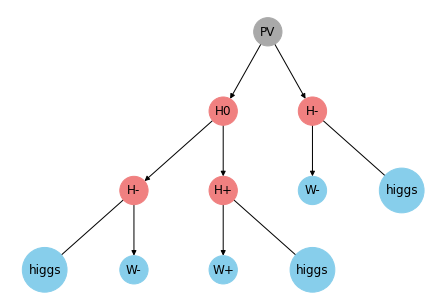

[PV, H0, H-, H-, H+, W-, higgs, higgs, W-, W+, higgs]
[PV, H0, H-, H-, H+, W-, higgs, higgs, W-, W+, higgs]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, H0), (PV, H-), (H0, H-), (H0, H+), (H-, W-), (H-, higgs), (H-, higgs), (H-, W-), (H+, W+), (H+, higgs)]
[(PV, H0), (PV, H-), (H0, H-), (H0, H+), (H-, W-), (H-, higgs), (H-, higgs), (H-, W-), (H+, W+), (H+, higgs)]


In [7]:
elMatched = expSMS.matchesTo(treeA)
elMatched.draw()
print(elMatched.nodes)
print(expSMS.nodes)
print(elMatched.nodeIndices)
print(expSMS.nodeIndices)
print(elMatched.edges)
print(expSMS.edges)

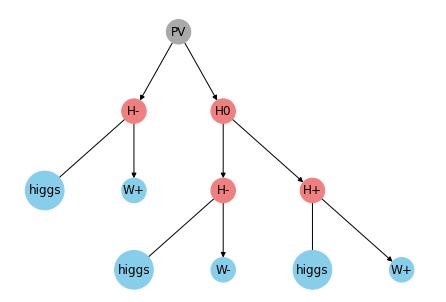

[PV, H-, H0, higgs, W+, H-, H+, higgs, W-, higgs, W+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, H-), (PV, H0), (H-, higgs), (H-, W+), (H0, H-), (H0, H+), (H-, higgs), (H-, W-), (H+, higgs), (H+, W+)]


In [8]:
stringElc = "(PV > H0(1),H-(2)), (H-(2) > W+,higgs), (H0(1) > H-(3),H+(4)), (H-(3) > higgs,W-), (H+(4) > W+,higgs)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringElc, model=model)
treeC = TheorySMS()
treeC.add_nodes_from(expSMS.nodes)
treeC.add_edges_from(expSMS.edgeIndices)
treeC.prodXSec = 1.0*fb
treeC.maxWeight = 1.0*fb
treeC.setGlobalProperties()

treeC.draw(nodeScale=3)
print(treeC.nodes)
print(treeC.nodeIndices)
print(treeC.edges)

In [9]:
treeC == treeA

False

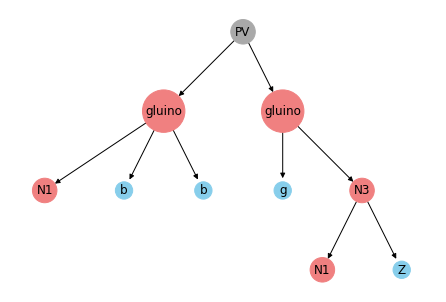

[PV, gluino, gluino, N1, b, b, g, N3, N1, Z]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(PV, gluino), (PV, gluino), (gluino, N1), (gluino, b), (gluino, b), (gluino, g), (gluino, N3), (N3, N1), (N3, Z)]


In [10]:
stringEl = "(PV > gluino(1),gluino(2)), (gluino(1) > N1,b,b), (gluino(2) > g,N3(3)), (N3(3) > N1,Z)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
treeA = TheorySMS()
treeA.add_nodes_from(expSMS.nodes)
treeA.add_edges_from(expSMS.edgeIndices)
treeA.prodXSec = 1.0*fb
treeA.maxWeight = 1.0*fb
treeA.setGlobalProperties()

treeA.draw(nodeScale=3)
print(treeA.nodes)
print(treeA.nodeIndices)
print(treeA.edges)

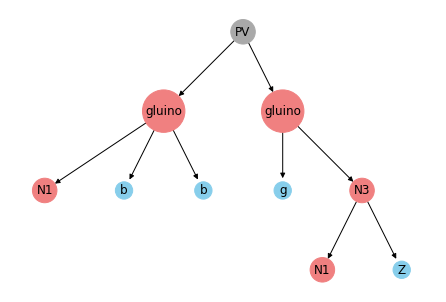

[PV, gluino, gluino, N1, b, b, g, N3, N1, Z]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(PV, gluino), (PV, gluino), (gluino, N1), (gluino, b), (gluino, b), (gluino, g), (gluino, N3), (N3, N1), (N3, Z)]


In [11]:
stringEl = "(PV > gluino(1),gluino(2)), (gluino(1) > g,N3(3)), (gluino(2) > N1,b,b), (N3(3) > N1,Z)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
treeB = TheorySMS()
treeB.add_nodes_from(expSMS.nodes)
treeB.add_edges_from(expSMS.edgeIndices)
treeB.prodXSec = 1.0*fb
treeB.maxWeight = 1.0*fb
treeB.setGlobalProperties()

treeB.draw(nodeScale=3)
print(treeB.nodes)
print(treeB.nodeIndices)
print(treeB.edges)

In [12]:
treeA == treeB

True

In [13]:
el1 = ExpSMS.from_string("(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),jet), (anyBSM(2) > anyBSM(4),jet), (anyBSM(3) > MET,Z), (anyBSM(4) > MET,W)",
             model=finalStates)
el2 = ExpSMS.from_string("(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),jet), (anyBSM(2) > anyBSM(4),jet), (anyBSM(3) > MET,W), (anyBSM(4) > MET,Z)",
             model=finalStates)

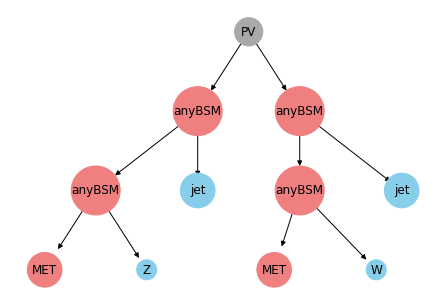

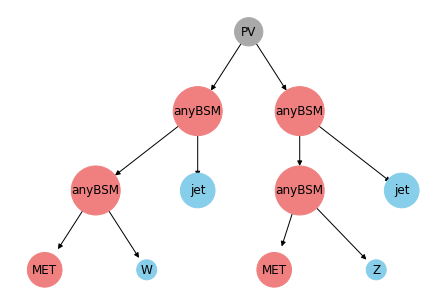

In [14]:
el1.draw()
el2.draw()

In [15]:
el1 == el2

True

In [16]:
el1 = ExpSMS.from_string("(PV > C1(1),MET), (C1(1) > anySM,MET)",model=finalStates)
el2 = ExpSMS.from_string("(PV > Hpm(1),MET), (Hpm(1) > anySM,MET)",model=finalStates)

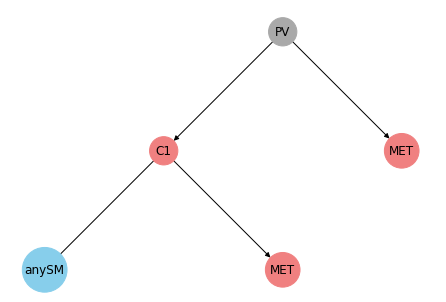

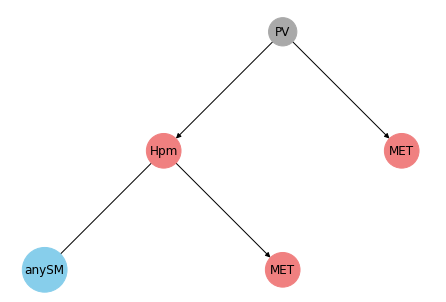

In [17]:
el1.draw()
el2.draw()

In [18]:
el1 == el2

False